<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.978485,38.013333,24.385119,-0.232886,145.144051,145.360293,-0.216242
1,0.0,1.0,21.928331,84.652559,73.651364,0.188404,190.420658,190.097467,0.323191
2,0.0,2.0,71.177093,27.185101,48.641749,0.757913,157.761856,157.014083,0.747774
3,0.0,3.0,94.847132,99.282300,83.859815,-0.962247,287.027001,288.033922,-1.006921
4,0.0,4.0,30.203497,95.363852,69.850630,0.079159,205.497138,205.291731,0.205407
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.125421,67.370802,69.374315,-0.698572,179.171966,179.878953,-0.706987
249996,999.0,246.0,41.495089,27.086230,39.348634,-0.750337,117.179616,117.961665,-0.782049
249997,999.0,247.0,76.937427,70.574553,76.369962,0.475976,234.357918,233.849586,0.508332
249998,999.0,248.0,99.315378,50.345144,32.471026,0.980272,193.111821,192.170802,0.941019


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.978485  38.013333  24.385119  ...  145.144051  145.360293 -0.216242
      1.0    21.928331  84.652559  73.651364  ...  190.420658  190.097467  0.323191
      2.0    71.177093  27.185101  48.641749  ...  157.761856  157.014083  0.747774
      3.0    94.847132  99.282300  83.859815  ...  287.027001  288.033922 -1.006921
      4.0    30.203497  95.363852  69.850630  ...  205.497138  205.291731  0.205407
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  33.125421  67.370802  69.374315  ...  179.171966  179.878953 -0.706987
      246.0  41.495089  27.086230  39.348634  ...  117.179616  117.961665 -0.782049
      247.0  76.937427  70.574553  76.369962  ...  234.357918  233.849586  0.508332
      248.0  99.315378  50.345144  32.471026  ...  193.111821  192.170802  0.941019
      249.0  67.988223  80.132058  21.406802  ...  180.201840  179.646814  0.555026

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.978485  38.013333  24.385119  ...  145.144051  145.360293 -0.216242
      1.0    21.928331  84.652559  73.651364  ...  190.420658  190.097467  0.323191
      2.0    71.177093  27.185101  48.641749  ...  157.761856  157.014083  0.747774
      3.0    94.847132  99.282300  83.859815  ...  287.027001  288.033922 -1.006921
      4.0    30.203497  95.363852  69.850630  ...  205.497138  205.291731  0.205407
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  33.125421  67.370802  69.374315  ...  179.171966  179.878953 -0.706987
      246.0  41.495089  27.086230  39.348634  ...  117.179616  117.961665 -0.782049
      247.0  76.937427  70.574553  76.369962  ...  234.357918  233.849586  0.508332
      248.0  99.315378  50.345144  32.471026  ...  193.111821  192.170802  0.941019
      249.0  67.988223  80.132058  21.406802  ...  180.201840  179.646814  0.555026

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.978485,38.013333,24.385119,-0.232886,145.144051,145.360293,-0.216242
1,0.0,1.0,21.928331,84.652559,73.651364,0.188404,190.420658,190.097467,0.323191
2,0.0,2.0,71.177093,27.185101,48.641749,0.757913,157.761856,157.014083,0.747774
3,0.0,3.0,94.847132,99.282300,83.859815,-0.962247,287.027001,288.033922,-1.006921
4,0.0,4.0,30.203497,95.363852,69.850630,0.079159,205.497138,205.291731,0.205407
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.125421,67.370802,69.374315,-0.698572,179.171966,179.878953,-0.706987
249996,999.0,246.0,41.495089,27.086230,39.348634,-0.750337,117.179616,117.961665,-0.782049
249997,999.0,247.0,76.937427,70.574553,76.369962,0.475976,234.357918,233.849586,0.508332
249998,999.0,248.0,99.315378,50.345144,32.471026,0.980272,193.111821,192.170802,0.941019


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.978485  38.013333  24.385119  ...  145.144051  145.360293 -0.216242
      1.0    21.928331  84.652559  73.651364  ...  190.420658  190.097467  0.323191
      2.0    71.177093  27.185101  48.641749  ...  157.761856  157.014083  0.747774
      3.0    94.847132  99.282300  83.859815  ...  287.027001  288.033922 -1.006921
      4.0    30.203497  95.363852  69.850630  ...  205.497138  205.291731  0.205407
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  33.125421  67.370802  69.374315  ...  179.171966  179.878953 -0.706987
      246.0  41.495089  27.086230  39.348634  ...  117.179616  117.961665 -0.782049
      247.0  76.937427  70.574553  76.369962  ...  234.357918  233.849586  0.508332
      248.0  99.315378  50.345144  32.471026  ...  193.111821  192.170802  0.941019
      249.0  67.988223  80.132058  21.406802  ...  180.201840  179.646814  0.555026

[250000 rows x 7 columns]

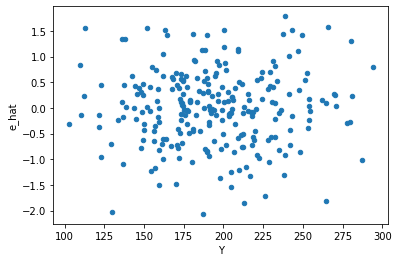

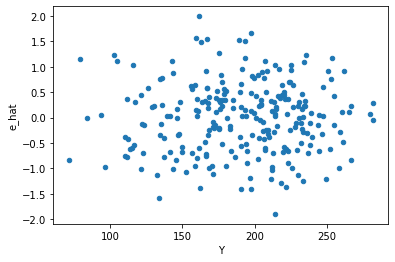

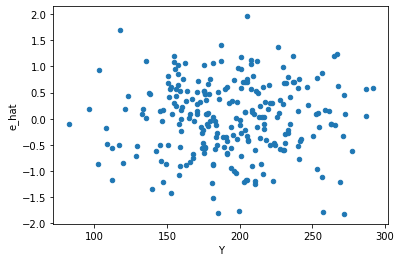

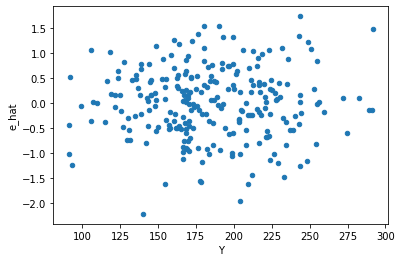

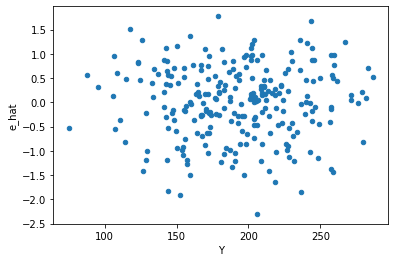

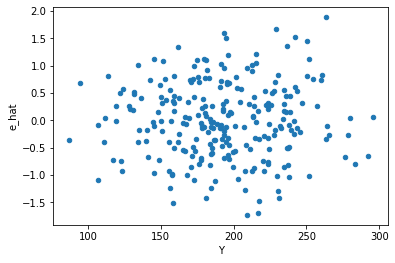

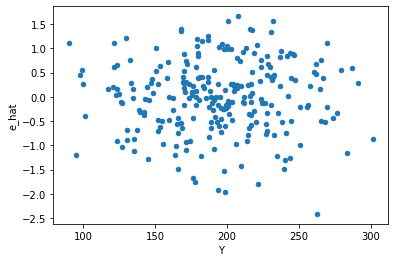

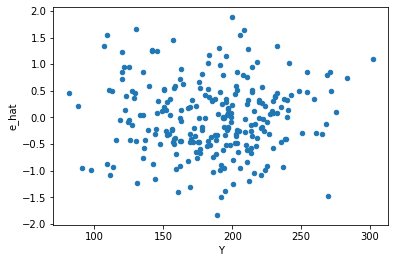

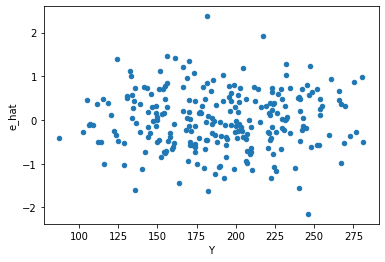

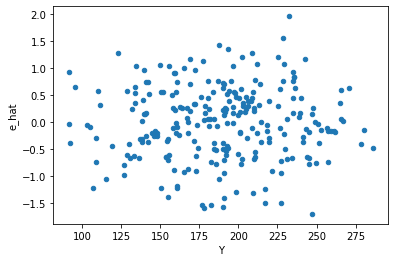

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,136.0,108.0,67.26788536918782,64.56551369265236,0.4946168041852046,0.5978288304875219,1.2086706828983322,0.30482956963794416,0.8475852151810279,0.15241478481897208,Reject001=1 : Homoscedasticity
1.0,137.0,107.0,64.87487305752717,52.41353650094685,0.4735392193980085,0.4898461355228677,1.0344362524936994,0.8590696608647481,0.5704651695676259,0.42953483043237406,Reject001=1 : Homoscedasticity
2.0,122.0,122.0,56.609069106951466,64.54075927328941,0.46400876317173334,0.5290226169941755,1.1401134180700376,0.4700263866857217,0.7649868066571391,0.23501319334286086,Reject001=1 : Homoscedasticity
3.0,141.0,103.0,65.13230687080326,56.57353046479089,0.46193125440286004,0.5492575773280669,1.189046145054839,0.3532349693249883,0.8233825153375058,0.17661748466249416,Reject001=1 : Homoscedasticity
5.0,145.0,99.0,60.807080855991444,56.2062086797586,0.4193591783171824,0.5677394816137232,1.3538262925160383,0.10747386370525525,0.9462630681473724,0.05373693185262762,Reject001=1 : Homoscedasticity
6.0,115.0,129.0,54.11356542625604,78.7457513740082,0.47055274283700904,0.610432181193862,1.2972662267645194,0.15070659176897494,0.9246467041155125,0.07535329588448747,Reject001=1 : Homoscedasticity
8.0,125.0,119.0,55.76475155534138,56.77502526865291,0.446118012442731,0.47710105267775554,1.0694503233917323,0.7126306629193302,0.6436846685403349,0.3563153314596651,Reject001=1 : Homoscedasticity
17.0,143.0,101.0,72.01591899302743,55.87327692724331,0.5036078251260659,0.5532007616558744,1.0984753096665925,0.6185640775652066,0.6907179612173967,0.3092820387826033,Reject001=1 : Homoscedasticity
20.0,119.0,125.0,48.129727844551304,56.42607239455427,0.4044514944920278,0.4514085791564341,1.116100658061314,0.5439844449130318,0.7280077775434841,0.2719922224565159,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,136.0,108.0,67.26788536918782,64.56551369265236,0.4946168041852046,0.5978288304875219,1.2086706828983322,0.30482956963794416,Reject001=1 : Homoscedasticity
1.0,137.0,107.0,64.87487305752717,52.41353650094685,0.4735392193980085,0.4898461355228677,1.0344362524936994,0.8590696608647481,Reject001=1 : Homoscedasticity
2.0,122.0,122.0,56.609069106951466,64.54075927328941,0.46400876317173334,0.5290226169941755,1.1401134180700376,0.4700263866857217,Reject001=1 : Homoscedasticity
3.0,141.0,103.0,65.13230687080326,56.57353046479089,0.46193125440286004,0.5492575773280669,1.189046145054839,0.3532349693249883,Reject001=1 : Homoscedasticity
4.0,131.0,113.0,73.23987495302588,62.42280061869875,0.5590830149085945,0.5524141647672456,0.9880718069347194,0.9438472985651407,Reject001=1 : Homoscedasticity
5.0,145.0,99.0,60.807080855991444,56.2062086797586,0.4193591783171824,0.5677394816137232,1.3538262925160383,0.10747386370525525,Reject001=1 : Homoscedasticity
6.0,115.0,129.0,54.11356542625604,78.7457513740082,0.47055274283700904,0.610432181193862,1.2972662267645194,0.15070659176897494,Reject001=1 : Homoscedasticity
7.0,102.0,142.0,46.091640224040304,63.98820043699017,0.45187882572588534,0.45062112983795893,0.9972167408244764,0.9959237146056066,Reject001=1 : Homoscedasticity
8.0,125.0,119.0,55.76475155534138,56.77502526865291,0.446118012442731,0.47710105267775554,1.0694503233917323,0.7126306629193302,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      990
Reject001=0 : Heteroscedasticity     10
Name: Result_test, dtype: int64